# Breast Cancer Classification
## Anurag Kushwaha

# Task

## To create any classification based ML to predict IRRADIAR VARIABLE based on the input variables given.


## INPUT VARIABLES :
    1. Class : Cancer has reoccured or not
    2. Age : Age the the time of diagnosis
    3. Menopause : During diagnosis patient is either pre or post menopausal
    4. Tumor_size : Tumor size
    5. INV_nodes : Lymph nodes
    6. Node_caps : It is one of prognostic factor of breast cancer
    7. Deg_malig : Degree of amlignancy of the tumor
    8. Breast : Left or right breast
    9. Breast_quad : Which section of the breast
    
## TARGET VARIABLE :
    - Irradiat : Whether patient needs to be irradiated or not

# Import essential libraries

In [1]:
import numpy as np
from sklearn import preprocessing, cross_decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# for data visualization
import seaborn as sns 


# Data Load

In [3]:
names= ['Class','Age','Menopause','Tumor_size','INV_nodes','Node_caps','Deg_malig','Breast','Breast_quad','Irradiat']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data')
df.columns = names

In [4]:
# Let's look at our data
df

,Class,Age,Menopause,Tumor_size,INV_nodes,Node_caps,Deg_malig,Breast,Breast_quad,Irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
obj_df = df

# Data manipulation


In [6]:
#Converting categorical data to numerical data
ord_enc = OrdinalEncoder()
obj_df["n_class"] = ord_enc.fit_transform(obj_df[["Class"]])
obj_df["n_age"] = ord_enc.fit_transform(obj_df[["Age"]])

obj_df["n_menopause"] = ord_enc.fit_transform(obj_df[["Menopause"]])
obj_df["n_tumor_size"] = ord_enc.fit_transform(obj_df[["Tumor_size"]])
obj_df["n_inv-nodes"] = ord_enc.fit_transform(obj_df[["INV_nodes"]])

obj_df["n_node-caps"] = ord_enc.fit_transform(obj_df[["Node_caps"]])
obj_df["n_breast-side"] = ord_enc.fit_transform(obj_df[["Breast"]])
obj_df["n_breast-quad"] = ord_enc.fit_transform(obj_df[["Breast_quad"]])
obj_df["n_irradiat"] = ord_enc.fit_transform(obj_df[["Irradiat"]])


In [7]:
#Creating a new data frame with the unique columns
new_df = obj_df[["n_class","n_age","n_menopause","n_tumor_size","n_inv-nodes","n_node-caps","Deg_malig","n_breast-side","n_breast-quad","n_irradiat"]]


In [8]:
# confirming the columns in the new dataframe 
new_df.columns


Index(['n_class', 'n_age', 'n_menopause', 'n_tumor_size', 'n_inv-nodes',
       'n_node-caps', 'Deg_malig', 'n_breast-side', 'n_breast-quad',
       'n_irradiat'],
      dtype='object')

# Data Visualization

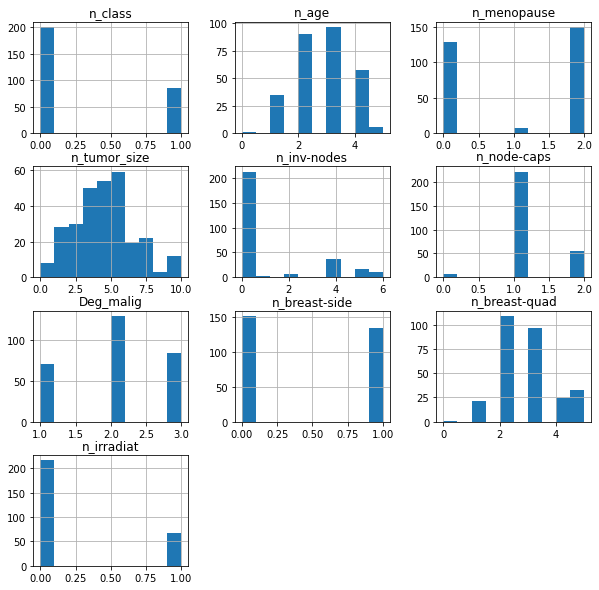

In [9]:
# Plot histograms for each variable
new_df.hist(figsize = (10, 10))
plt.show()

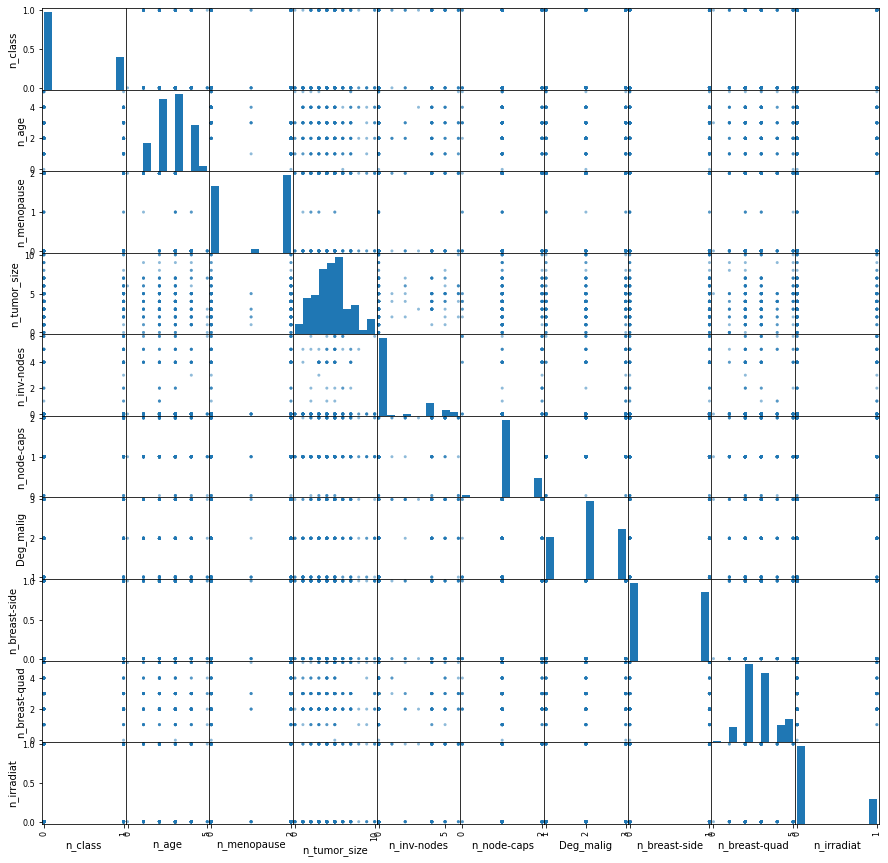

In [10]:
# Create scatter plot matrix
scatter_matrix(new_df, figsize = (15, 15))
plt.show()

In [11]:
# sns.pairplot(new_df, hue = 'n_irradiat') 
# pair plot of sample feature
# sns.pairplot(new_df, hue = 'n_irradiat', 
#              vars = ['n_inv-nodes','n_node-caps'] )

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='n_irradiat', ylabel='count'>

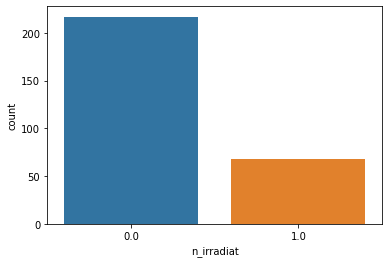

In [12]:
# Count the target class
sns.countplot(new_df['n_irradiat'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='n_age', ylabel='count'>

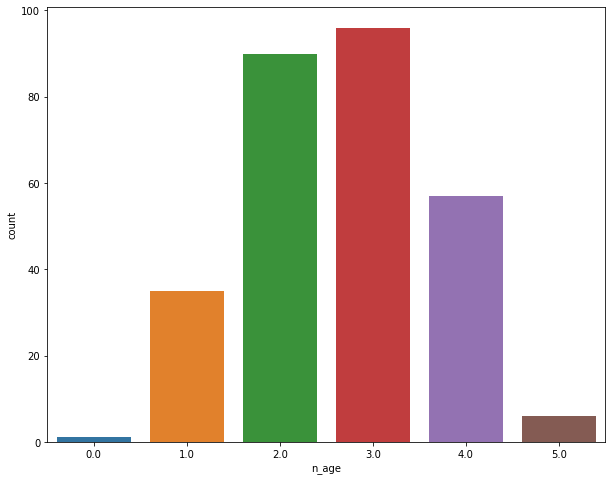

In [13]:
# counter plot of feature mean radius
plt.figure(figsize = (10,8))
sns.countplot(new_df['n_age'])

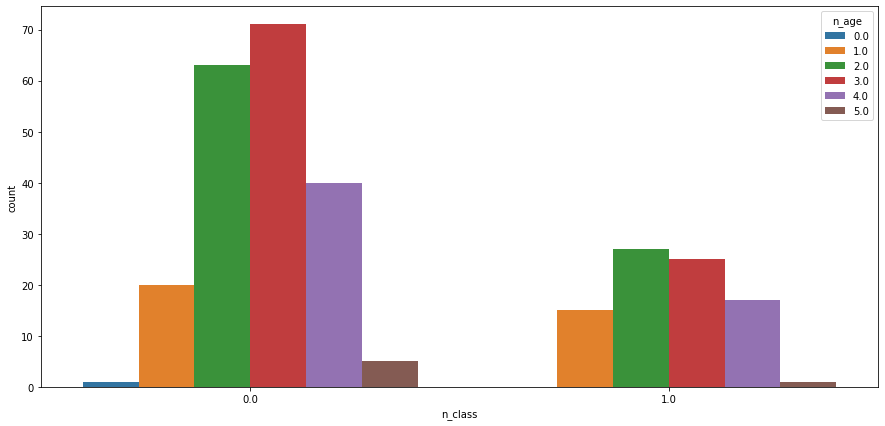

In [14]:
plt.figure(figsize = (15,7))
sns.countplot(x = "n_class",hue =  "n_age" , data = new_df)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


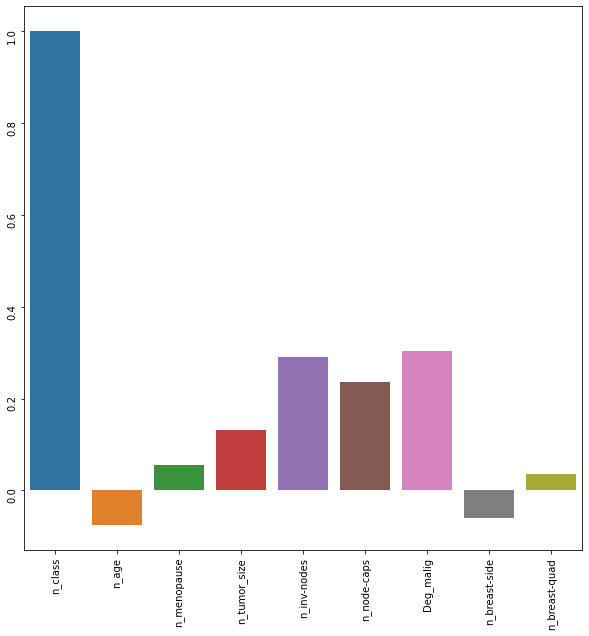

In [15]:
# create second DataFrame by droping target
df2 = new_df.drop(['n_irradiat'], axis = 1)
# visualize correlation barplot
plt.figure(figsize = (10,10))
ax = sns.barplot(df2.corrwith(new_df.n_class).index, df2.corrwith(new_df.n_class))
ax.tick_params(labelrotation = 90) 

In [16]:
# # heatmap of DataFrame
# plt.figure(figsize=(16,9))
# sns.heatmap(new_df)

<AxesSubplot:>

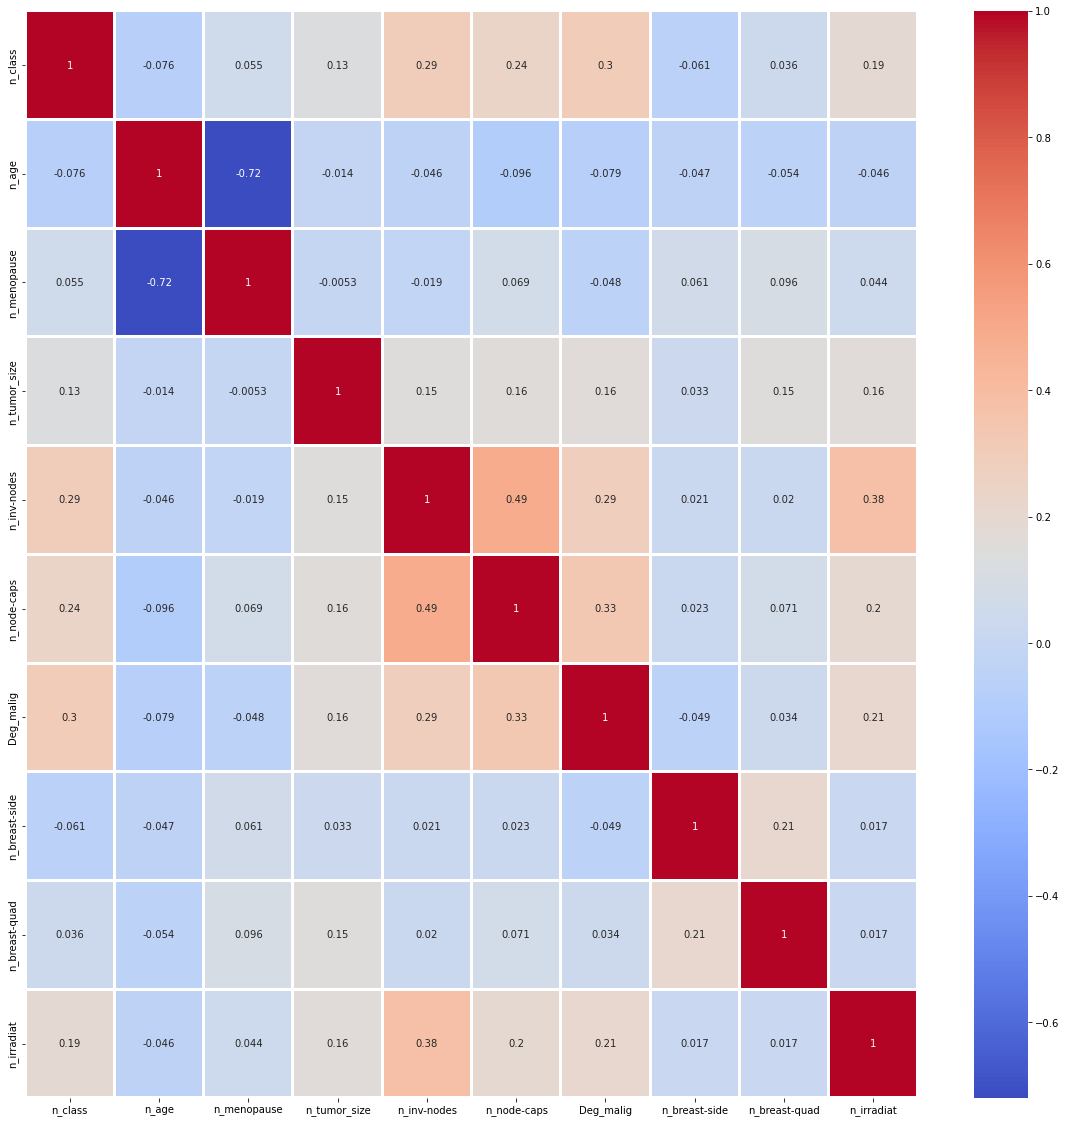

In [17]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

# Create X and Y datasets for training

In [18]:
# Input Variables
X = np.array(new_df.drop(['n_irradiat'], 1))
X

array([[0., 2., 2., ..., 2., 1., 5.],
       [0., 2., 2., ..., 2., 0., 2.],
       [0., 4., 0., ..., 2., 1., 3.],
       ...,
       [1., 4., 0., ..., 1., 1., 3.],
       [1., 2., 0., ..., 3., 0., 2.],
       [1., 3., 0., ..., 3., 0., 2.]])

In [19]:
# Target Variable
y = np.array(new_df['n_irradiat'])
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0.

# Split DataSet into Train and Test

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [21]:
X_train

array([[0., 2., 2., ..., 2., 0., 2.],
       [0., 3., 2., ..., 2., 0., 2.],
       [0., 2., 2., ..., 2., 0., 2.],
       ...,
       [0., 3., 0., ..., 3., 0., 3.],
       [0., 3., 1., ..., 3., 1., 3.],
       [0., 4., 0., ..., 1., 0., 1.]])

In [22]:
X_test

array([[ 0.,  1.,  2.,  5.,  0.,  1.,  2.,  0.,  3.],
       [ 0.,  3.,  2.,  4.,  4.,  1.,  2.,  1.,  3.],
       [ 1.,  1.,  2.,  7.,  0.,  1.,  1.,  0.,  3.],
       [ 0.,  3.,  0.,  2.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  3.,  0.,  5.,  0.,  1.,  1.,  0.,  3.],
       [ 0.,  1.,  2.,  5.,  5.,  2.,  2.,  1.,  5.],
       [ 1.,  1.,  2.,  5.,  6.,  1.,  2.,  1.,  3.],
       [ 0.,  3.,  2.,  2.,  0.,  1.,  1.,  0.,  2.],
       [ 0.,  3.,  0.,  3.,  0.,  1.,  3.,  1.,  3.],
       [ 0.,  3.,  0.,  2.,  0.,  1.,  2.,  1.,  5.],
       [ 0.,  2.,  0.,  4.,  0.,  1.,  2.,  0.,  2.],
       [ 0.,  2.,  2.,  4.,  0.,  1.,  2.,  0.,  3.],
       [ 0.,  3.,  0.,  3.,  0.,  1.,  1.,  1.,  2.],
       [ 0.,  1.,  2.,  3.,  4.,  2.,  2.,  1.,  3.],
       [ 0.,  2.,  2.,  1.,  0.,  1.,  1.,  1.,  3.],
       [ 1.,  4.,  0.,  4.,  4.,  1.,  2.,  1.,  5.],
       [ 1.,  1.,  2.,  6.,  6.,  2.,  3.,  0.,  2.],
       [ 0.,  1.,  2.,  3.,  4.,  1.,  2.,  1.,  1.],
       [ 1.,  5.,  0.,  2., 

In [23]:
y_train

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
y_test

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0.])

# Machine Learning Model Building

In [25]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision Tree ',DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression()))

In [26]:
# Model Selection based on their accuracy
# Evaluate each model in turn 
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean() , cv_results.std())
    print(msg)

KNN: 0.768182 (0.049652)
SVM: 0.763636 (0.063655)
Random Forest: 0.790119 (0.059373)
Decision Tree : 0.705336 (0.095536)
Logistic Regression: 0.776087 (0.066575)


## Here, out of 5 models applied , KNN model has performed best with accuracy upto 80.7 % so we're going to apply this model for application purpose

## Testing the model prepared on the test dataset and checking the acurracy of our model

In [27]:


clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy: ",accuracy * 100)



Accuracy:  73.68421052631578


## Confusion matrix to find out the number of correct and incorrect predictions

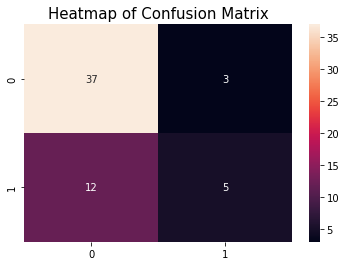

In [28]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Application of above trained model on dummy data

In [33]:
# Checking the relation between the categorical and respective numerical value

print(obj_df[["Age", "n_age"]].value_counts(),"\n")
print(obj_df[["Menopause", "n_menopause"]].value_counts(),'\n')
print(obj_df[["Tumor_size", "n_tumor_size"]].value_counts(),'\n')
print(obj_df[["INV_nodes", "n_inv-nodes"]].value_counts(),'\n')
print(obj_df[["Node_caps", "n_node-caps"]].value_counts(),'\n')
print(obj_df[["Deg_malig"]].value_counts(),'\n')
print(obj_df[["Breast", "n_breast-side"]].value_counts(),'\n')
print(obj_df[["Breast_quad", "n_breast-quad"]].value_counts(),'\n')
print(obj_df[["Irradiat", "n_irradiat"]].value_counts(),'\n')

Age    n_age
50-59  3.0      96
40-49  2.0      90
60-69  4.0      57
30-39  1.0      35
70-79  5.0       6
20-29  0.0       1
dtype: int64 

Menopause  n_menopause
premeno    2.0            149
ge40       0.0            129
lt40       1.0              7
dtype: int64 

Tumor_size  n_tumor_size
30-34       5.0             59
25-29       4.0             54
20-24       3.0             50
15-19       2.0             30
10-14       1.0             28
40-44       7.0             22
35-39       6.0             19
50-54       10.0             8
0-4         0.0              8
5-9         9.0              4
45-49       8.0              3
dtype: int64 

INV_nodes  n_inv-nodes
0-2        0.0            212
3-5        4.0             36
6-8        5.0             17
9-11       6.0             10
15-17      2.0              6
12-14      1.0              3
24-26      3.0              1
dtype: int64 

Node_caps  n_node-caps
no         1.0            221
yes        2.0             56
?          0.0    

In [30]:
# ["n_class","n_age","n_menopause","n_tumor_size","n_inv-nodes","n_node-caps","Deg_malig","n_breast-side","n_breast-quad","n_irradiat"]]

dummy_data = [1,1,2,5,0,1,1,1,2]
example = np.array([dummy_data])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)

print(prediction )
if prediction == 0:
    print("Irradiat Not needed")
else:
    print("Irradiat needed")

[0.]
Irradiat Not needed
